Consider the dataset iris. Apply the PCA method to select the best 2 features. Using these
features plot the scatter graph. Apply k-means clustering algorithm to cluster the transformed
dataset into 3 clusters.

In [28]:
from sklearn.datasets import load_iris
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import pandas as pd

/tmp/ipykernel_57527/1345684833.py:5: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [29]:
iris=load_iris()
x=iris.data
y=iris.target

In [30]:
scaler=StandardScaler()
x=scaler.fit_transform(x)

pca=PCA(n_components=2)
x_pca=pca.fit_transform(x)
print(x_pca)

[[-2.26470281  0.4800266 ]
 [-2.08096115 -0.67413356]
 [-2.36422905 -0.34190802]
 [-2.29938422 -0.59739451]
 [-2.38984217  0.64683538]
 [-2.07563095  1.48917752]
 [-2.44402884  0.0476442 ]
 [-2.23284716  0.22314807]
 [-2.33464048 -1.11532768]
 [-2.18432817 -0.46901356]
 [-2.1663101   1.04369065]
 [-2.32613087  0.13307834]
 [-2.2184509  -0.72867617]
 [-2.6331007  -0.96150673]
 [-2.1987406   1.86005711]
 [-2.26221453  2.68628449]
 [-2.2075877   1.48360936]
 [-2.19034951  0.48883832]
 [-1.898572    1.40501879]
 [-2.34336905  1.12784938]
 [-1.914323    0.40885571]
 [-2.20701284  0.92412143]
 [-2.7743447   0.45834367]
 [-1.81866953  0.08555853]
 [-2.22716331  0.13725446]
 [-1.95184633 -0.62561859]
 [-2.05115137  0.24216355]
 [-2.16857717  0.52714953]
 [-2.13956345  0.31321781]
 [-2.26526149 -0.3377319 ]
 [-2.14012214 -0.50454069]
 [-1.83159477  0.42369507]
 [-2.61494794  1.79357586]
 [-2.44617739  2.15072788]
 [-2.10997488 -0.46020184]
 [-2.2078089  -0.2061074 ]
 [-2.04514621  0.66155811]
 

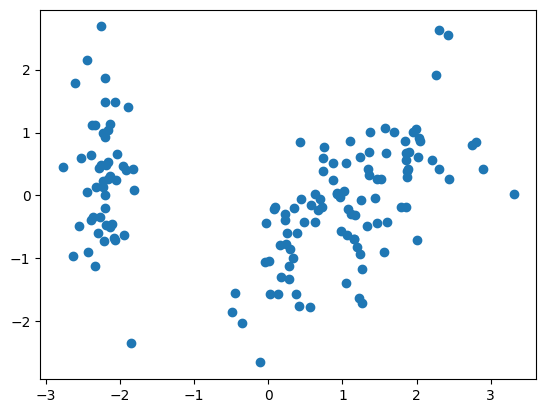

In [31]:
import matplotlib.pyplot as plt

xes=x_pca[:,0]
yes=x_pca[:,1]
plt.scatter(xes,yes)

In [32]:
kmeans = KMeans(n_clusters=3, random_state=0, n_init=500)
kmeans.fit(x_pca)
print("Cluster centers at : \n",kmeans.cluster_centers_)
kmeans.labels_

Cluster centers at : 
 [[ 0.57262144 -0.80720888]
 [-2.22475316  0.28892745]
 [ 1.72103664  0.60288719]]


array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 2, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 2,
       0, 0, 0, 0, 2, 0, 0, 0, 0, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 2, 2, 2, 2, 2,
       2, 0, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0], dtype=int32)

In [46]:
df=pd.DataFrame([xes,yes,kmeans.labels_])
df=df.T
df.columns=['F1','F2','Class']
df

,F1,F2,Class
0,-2.264703,0.480027,1.0
1,-2.080961,-0.674134,1.0
2,-2.364229,-0.341908,1.0
3,-2.299384,-0.597395,1.0
4,-2.389842,0.646835,1.0
...,...,...,...
145,1.870503,0.386966,2.0
146,1.564580,-0.896687,0.0
147,1.521170,0.269069,2.0
148,1.372788,1.011254,2.0


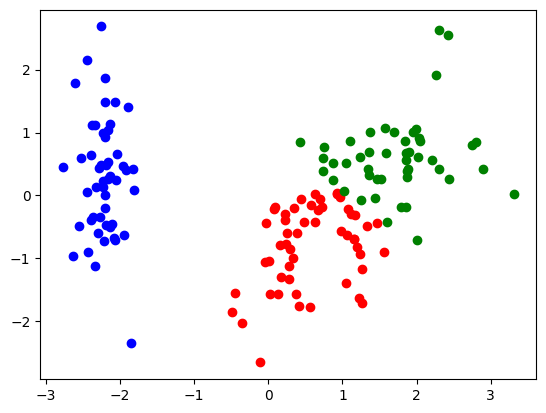

In [55]:
plt.scatter(df[df['Class'] == 0.0]['F1'],df[df['Class'] == 0.0]['F2'],c='red')
plt.scatter(df[df['Class'] == 1.0]['F1'],df[df['Class'] == 1.0]['F2'],c='blue')
plt.scatter(df[df['Class'] == 2.0]['F1'],df[df['Class'] == 2.0]['F2'],c='green')